In [8]:
%matplotlib inline

import seaborn as sns
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import glob
import urllib

In [9]:
def get_feed(fileurl, filename):
    
    destdir = r'C:\Users\groov\PythonCode\data'
    file = destdir + '\\' + filename

    urllib.request.urlretrieve(fileurl, file)

In [10]:
fileurl = r'https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD'
destfile = 'Meteorite_Landings'

get_feed(fileurl, destfile)

In [73]:
path = r'C:\Users\groov\PythonCode\data\Meteorite_Landings'
df = pd.read_csv(path)

df.columns = ['name', 'id', 'name_type', 'rec_class', 'mass_g', 'fall_class', 'fall_year', 'lat', 'lon', 'geo_location']
dropcols = ['name_type', 'geo_location', 'fall_class', 'id', 'rec_class']

df.drop(dropcols, axis=1, inplace=True)

df['fall_year'] = pd.to_datetime(df['fall_year'], errors='coerce')
df['fall_year'] = df['fall_year'].dt.year
df['fall_year'].astype('int', errors='ignore')
df['mass_g'] = df['mass_g'].fillna(df['mass_g'].mean())

labels = range(0,100,1)
df['bin'] = pd.cut(df['mass_g'], bins=100, labels=labels)
df['bin'] = df['bin'].astype('int')

df.head(3)

,name,mass_g,fall_year,lat,lon,bin
0,Aachen,21.0,1880.0,50.77500,6.08333,0
1,Aarhus,720.0,1951.0,56.18333,10.23333,0
2,Abee,107000.0,1952.0,54.21667,-113.00000,0


In [74]:
df['bin'].value_counts()

0     45641
1        30
2         9
3         9
4         6
6         3
25        1
96        1
99        1
36        1
38        1
7         1
26        1
8         1
40        1
11        1
43        1
14        1
46        1
15        1
16        1
49        1
83        1
39        1
Name: bin, dtype: int64

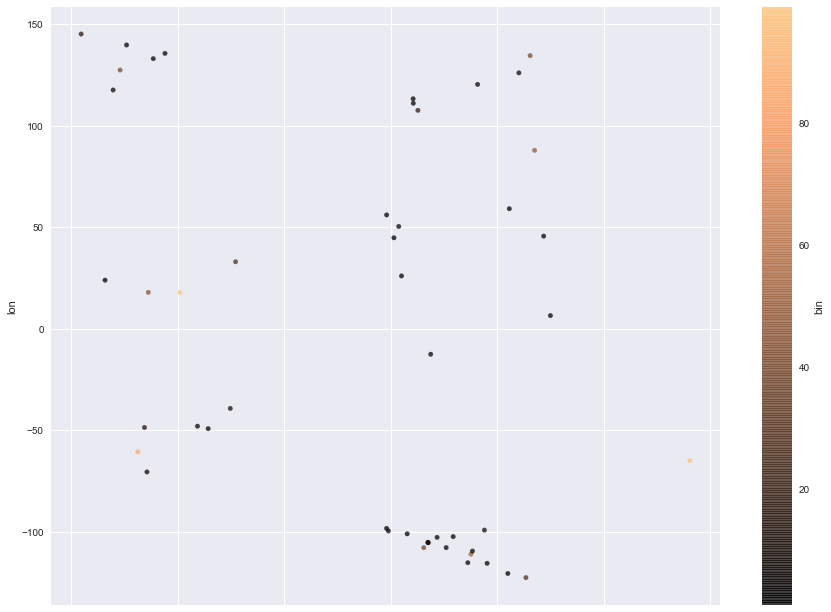

In [113]:
biggest = df.sort_values(by='mass_g', ascending=False)
biggest.head(3)

biggest = biggest[['lat', 'lon', 'bin']]
biggest = biggest[:50]

biggest.plot.scatter('lat', 'lon', c='bin', cmap='copper', figsize=(15, 11), alpha=0.75)

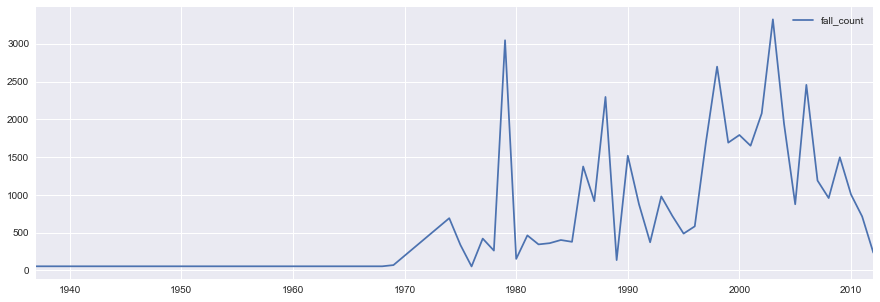

In [114]:
falls = df['fall_year'].value_counts()
falls = pd.DataFrame(falls).sort_index()
falls.columns = ['fall_count']
falls
falls[falls['fall_count'] > 50].plot(figsize=(15, 5))

In [75]:
geo = df[['lat', 'lon', 'bin']]
geo.head(3)

,lat,lon,bin
0,50.77500,6.08333,0
1,56.18333,10.23333,0
2,54.21667,-113.00000,0


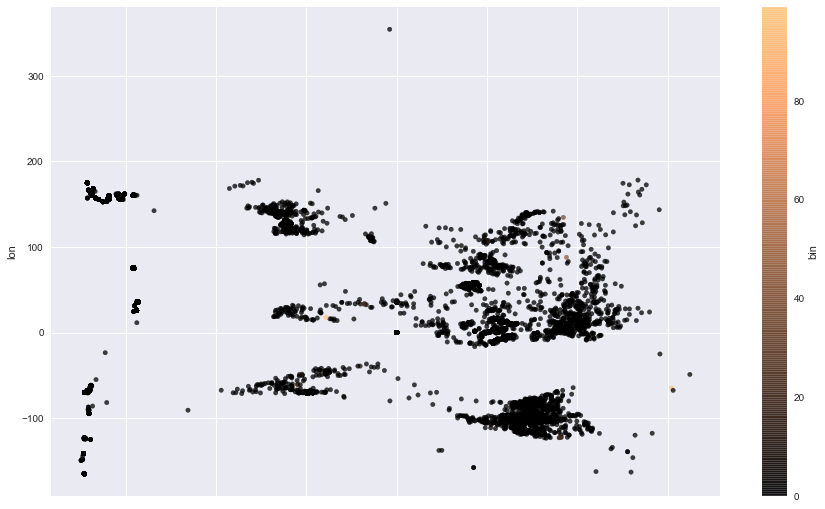

In [107]:
geo.plot.scatter('lat', 'lon', c='bin', cmap='copper', figsize=(15, 9), alpha=0.75)

In [115]:
#sns.set(rc={'figure.figsize':(10,10)})
#sns.kdeplot(geo['lat'], geo['lon'], shade=True, cmap='hot', legend=True)